### Import necessary libraries and Data

In [457]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [458]:
# import the data
term = pd.read_csv('bank-full.csv')

In [459]:
# get number of columns and rows in raw data
term.shape

(45211, 17)

In [460]:
term.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [461]:
# get summary statistics of data
term.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


In [462]:
term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [463]:
# check for missing values
term.isnull().all()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [464]:
# check unique values in the attributes
term.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [465]:
# checking value counts of all object type columns
for i in list(term.columns[term.dtypes=='object']):   
    print(term[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

### Univariate Analysis of Continuous Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001265E34DD08>,
      dtype=object)

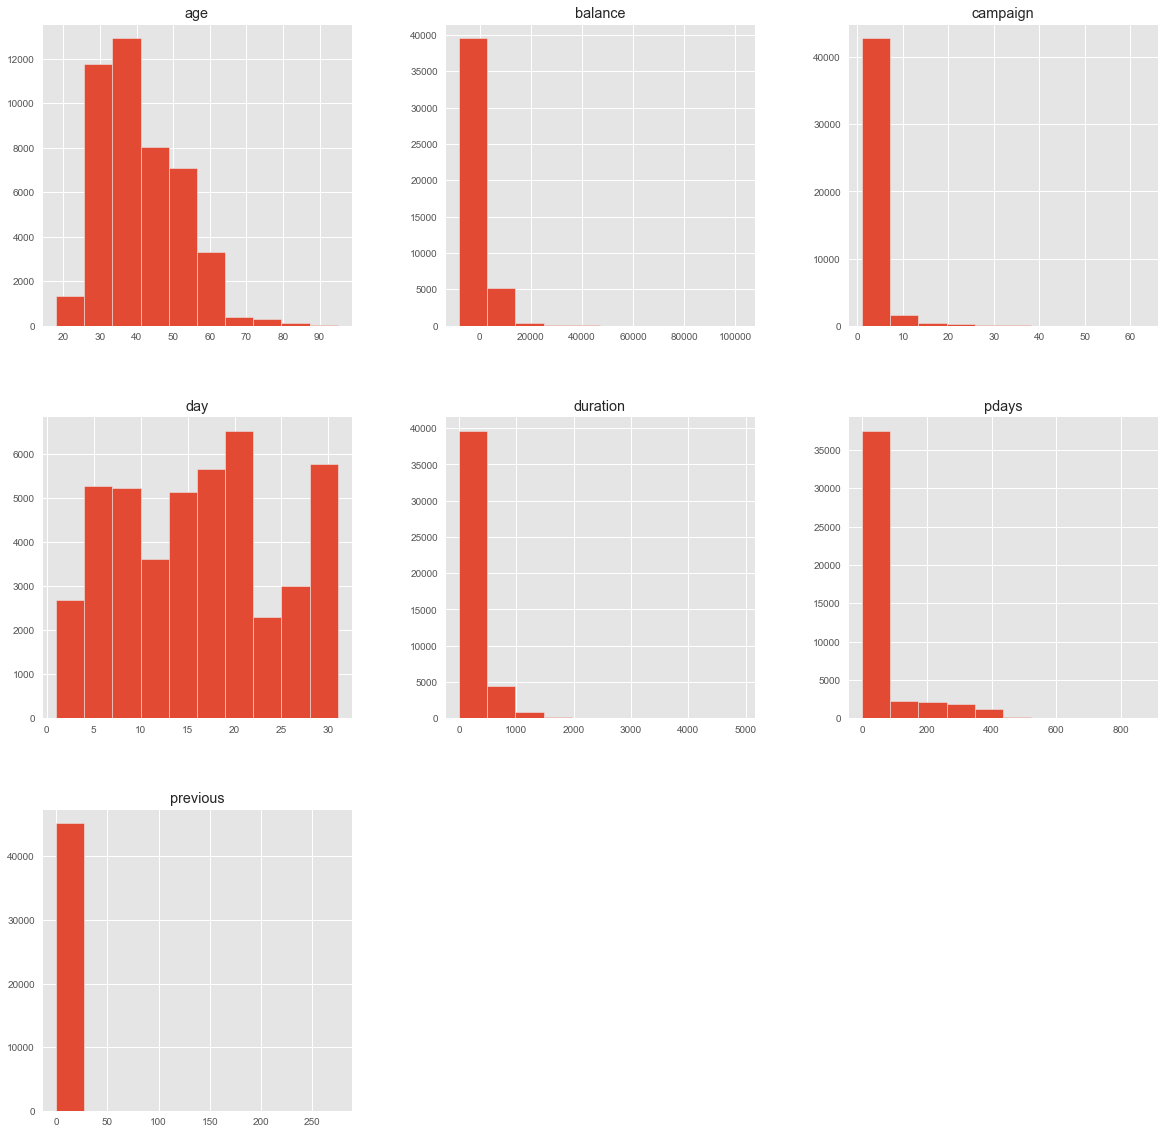

In [466]:
# plot the distributions of the numerical variables
import matplotlib.pyplot as plt
%matplotlib inline

term.hist(figsize=(20,20))

# Note that majority of them are skewed

### Univariate Analysis of Categorical Variables

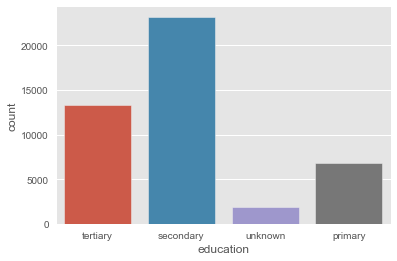

In [467]:
sns.countplot(term['education'])
# majority of the customers are educated up to Secondary school levels
# those whose education levels are unknown are the least

In [468]:
#replace those whose education are unknown values with the mode of the variable
term['education'] = term['education'].replace(['unknown'],term['education'].mode()) 

In [469]:
term['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

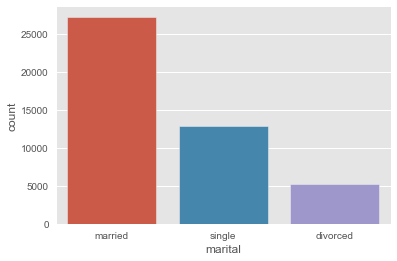

In [470]:
sns.countplot(term['marital']) 
# majority are married

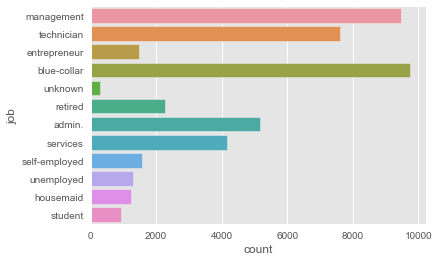

In [471]:
sns.countplot(y = term['job'])
# those with blue-collar jobs are in the majority

In [472]:
#replace those whose jobs are unknown with the mode of the variable
term['job'] = term['job'].replace(['unknown'],term['job'].mode()) 

In [473]:
term['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

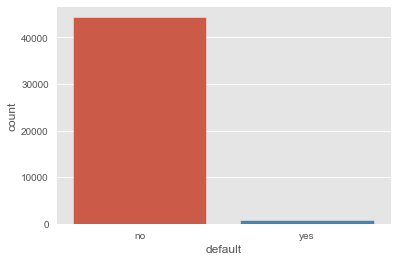

In [474]:
sns.countplot(term['default'])
# majority of the customers have their credit in default

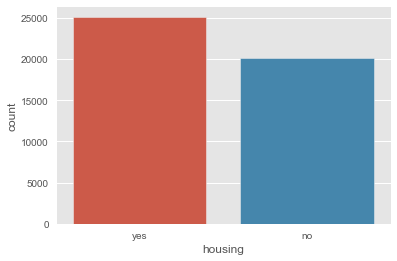

In [475]:
sns.countplot(term['housing'])
# majoirty of the climets have housing loan

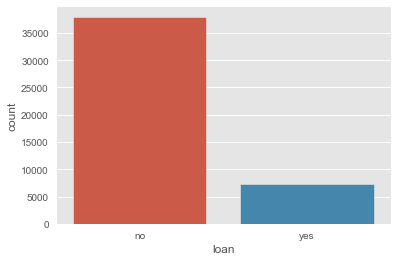

In [476]:
sns.countplot(term['loan'])
# majority of the clients do not have personal loans

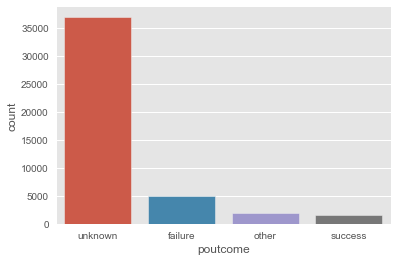

In [477]:
sns.countplot(term['poutcome'])
# the outcome from previous marketing campaign is unknown

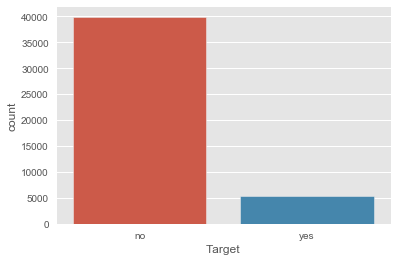

In [478]:
sns.countplot(term['Target'])
# majority of the clients have not subscribed to a term deposit

In [479]:
term['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

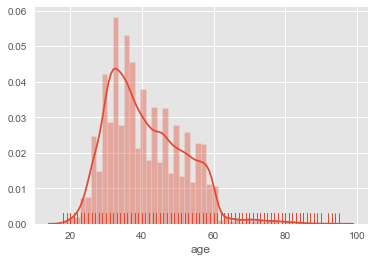

In [480]:
sns.distplot(term['age'], kde=True, rug=True);

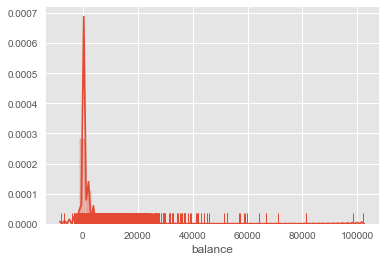

In [481]:
sns.distplot(term['balance'], kde=True, rug=True);

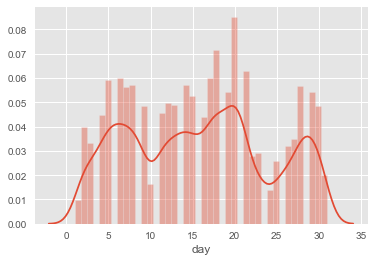

In [482]:
sns.distplot(term['day']);

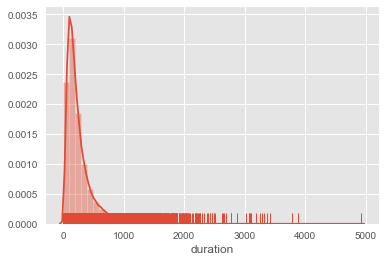

In [483]:
sns.distplot(term['duration'], kde=True, rug=True);

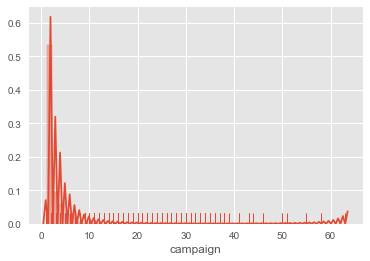

In [484]:
sns.distplot(term['campaign'], kde=True, rug=True);

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


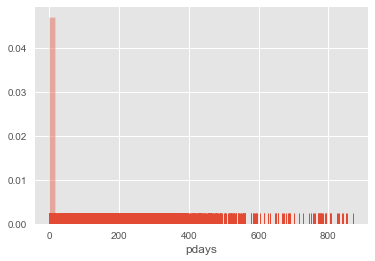

In [485]:
sns.distplot(term['pdays'], kde=True, rug=True);

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


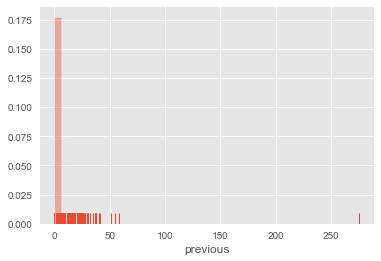

In [486]:
sns.distplot(term['previous'], kde=True, rug=True);

### Detecting Outliers

In [487]:
# most of the numerical variables have extreme values

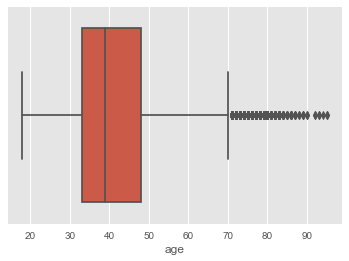

In [488]:
sns.boxplot(x = term['age']);

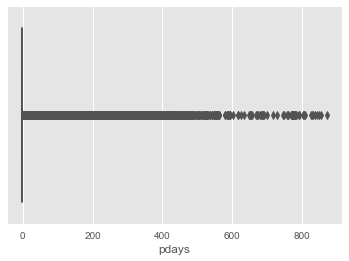

In [489]:
sns.boxplot(x = term['pdays']);

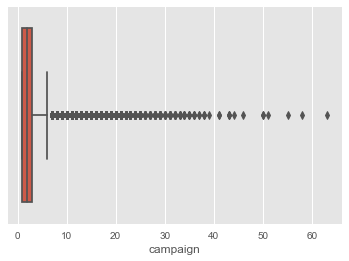

In [490]:
sns.boxplot(x = term['campaign']);

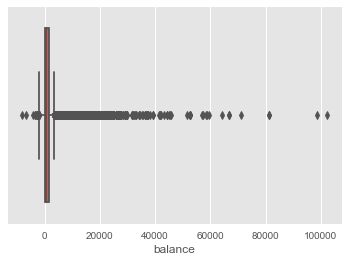

In [491]:
sns.boxplot(x = term['balance']);

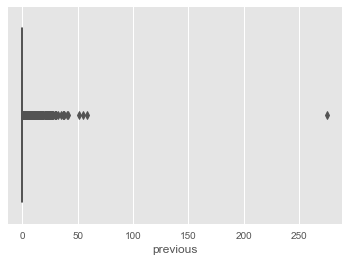

In [492]:
sns.boxplot(x = term['previous']);

### Outliers Treatment

In [493]:
# view skewness of numerical variables
term.skew() 

# balance, duration, campaign, previous are highly skewed. Data is imbalance

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

In [494]:
# Find the Inter-Quantile Range of the numerical variables
Q1 = term.quantile(0.25)
Q3 = term.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.00
balance    1,356.00
day           13.00
duration     216.00
campaign       2.00
pdays          0.00
previous       0.00
dtype: float64


In [495]:
# Find the 10th and 90th Percentile
print(term['age'].quantile(0.10))
print(term['age'].quantile(0.90))
print(term['balance'].quantile(0.10))
print(term['balance'].quantile(0.90))
print(term['duration'].quantile(0.10))
print(term['duration'].quantile(0.90))
print(term['campaign'].quantile(0.10))
print(term['campaign'].quantile(0.90))

29.0
56.0
0.0
3574.0
58.0
548.0
1.0
5.0


In [496]:
# Use Log Transformation to address the extreme values in the numerical variables
term["Log_age"] = term["age"].map(lambda i: np.log(i) if i > 0 else 0) 
term["Log_balance"] = term["balance"].map(lambda i: np.log(i) if i > 0 else 0)
term["Log_duration"] = term["duration"].map(lambda i: np.log(i) if i > 0 else 0) 
term["Log_campaign"] = term["campaign"].map(lambda i: np.log(i) if i > 0 else 0)

# Compare skewness of numerical predictors before and after log transformation
print(term['age'].skew())
print(term['Log_age'].skew())
print(term['balance'].skew())
print(term['Log_balance'].skew())
print(term['duration'].skew())
print(term['Log_duration'].skew())
print(term['campaign'].skew())
print(term['Log_campaign'].skew())

0.6848179257252598
0.0989014480878478
8.360308326166326
-0.8614392203590333
3.144318099423456
-0.5066496877758495
4.898650166179674
0.8802108957712975


In [497]:
term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           45211 non-null  int64  
 1   job           45211 non-null  object 
 2   marital       45211 non-null  object 
 3   education     45211 non-null  object 
 4   default       45211 non-null  object 
 5   balance       45211 non-null  int64  
 6   housing       45211 non-null  object 
 7   loan          45211 non-null  object 
 8   contact       45211 non-null  object 
 9   day           45211 non-null  int64  
 10  month         45211 non-null  object 
 11  duration      45211 non-null  int64  
 12  campaign      45211 non-null  int64  
 13  pdays         45211 non-null  int64  
 14  previous      45211 non-null  int64  
 15  poutcome      45211 non-null  object 
 16  Target        45211 non-null  object 
 17  Log_age       45211 non-null  float64
 18  Log_balance   45211 non-nu

### Bivariate Analysis

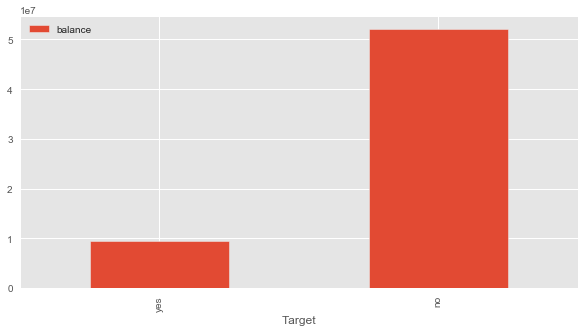

In [498]:
term.groupby(by=['Target'])['balance'].sum().reset_index().sort_values(['balance']).tail(10).plot(x='Target',y='balance',kind='bar', figsize=(10,5))
plt.show()

# majority of the clients that had more balance in their account did not subscribe

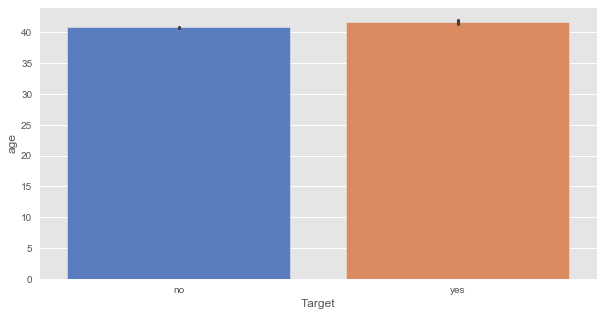

In [499]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Target', y='age', data=term, palette='muted')  
# Age doesnt seem to play a part in whether a client subscribe or not

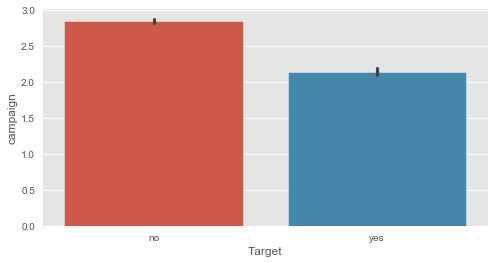

In [500]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Target", y="campaign", data=term)
# those who were contacted more in this campaign did not subscribe

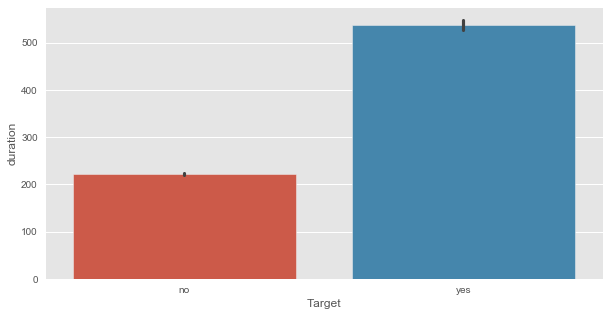

In [501]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Target', y='duration', data=term)
# those who the marketer spent longer time with during contact subscribed the more

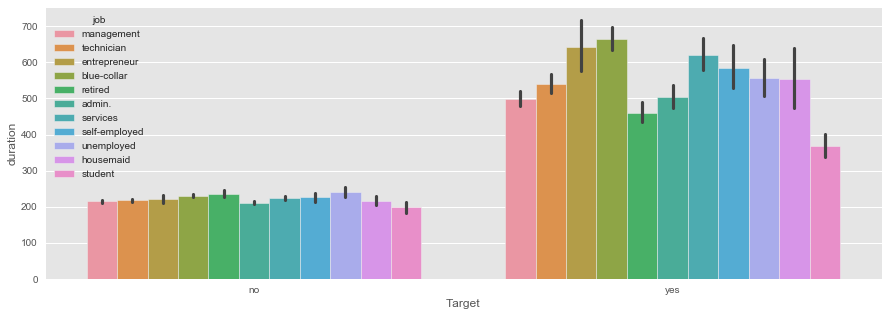

In [502]:
plt.figure(figsize=(15,5))
sns.barplot(data=term,x='Target',y='duration',hue='job')
plt.show()

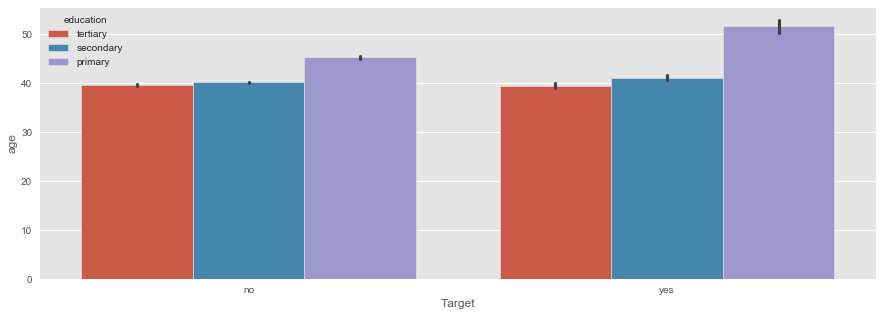

In [503]:
plt.figure(figsize=(15,5))
sns.barplot(data=term,x='Target',y='age',hue='education')
plt.show()
# education level didnt indicate whether a client will subscribe or not

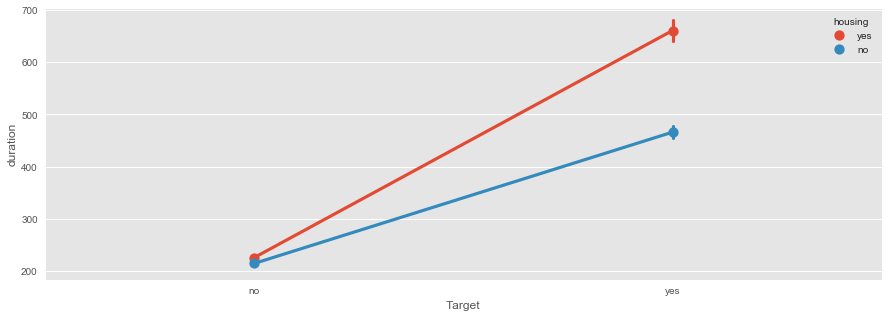

In [504]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Target", y="duration", hue = 'housing',  data=term)
plt.show()
# those with housing loan are most likely to subscribe more

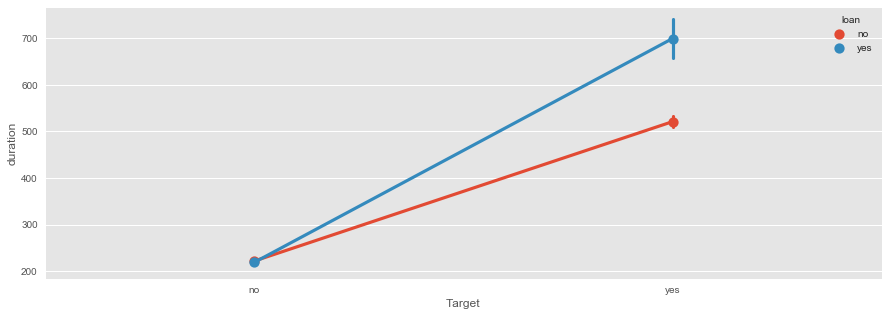

In [505]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Target", y="duration", hue = 'loan',  data=term)
plt.show()

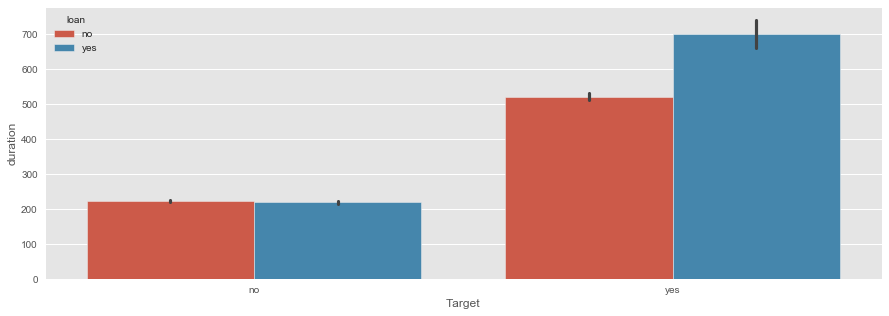

In [506]:
plt.figure(figsize=(15,5))
sns.barplot(data=term,x='Target',y='duration',hue='loan')
plt.show()

### Use correlation method to observe the relationship between different variables

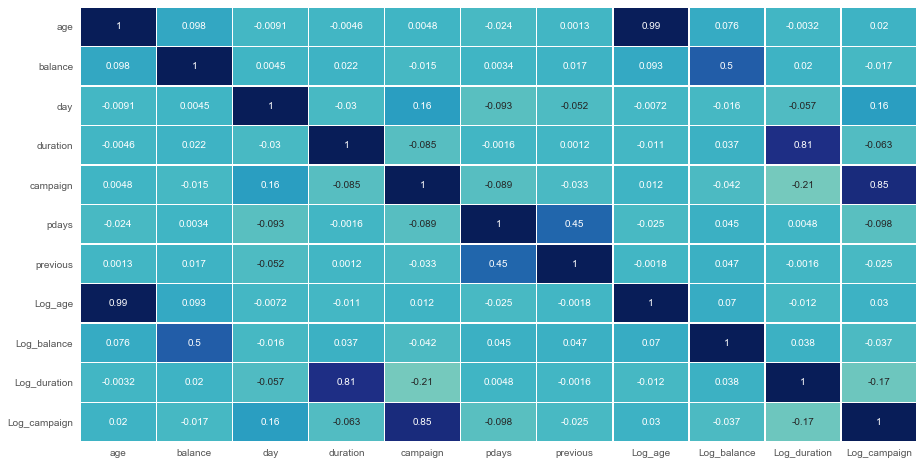

In [507]:
# Correlation is poor amongst the variables
plt.figure(figsize=(15,8))

sns.heatmap(term.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

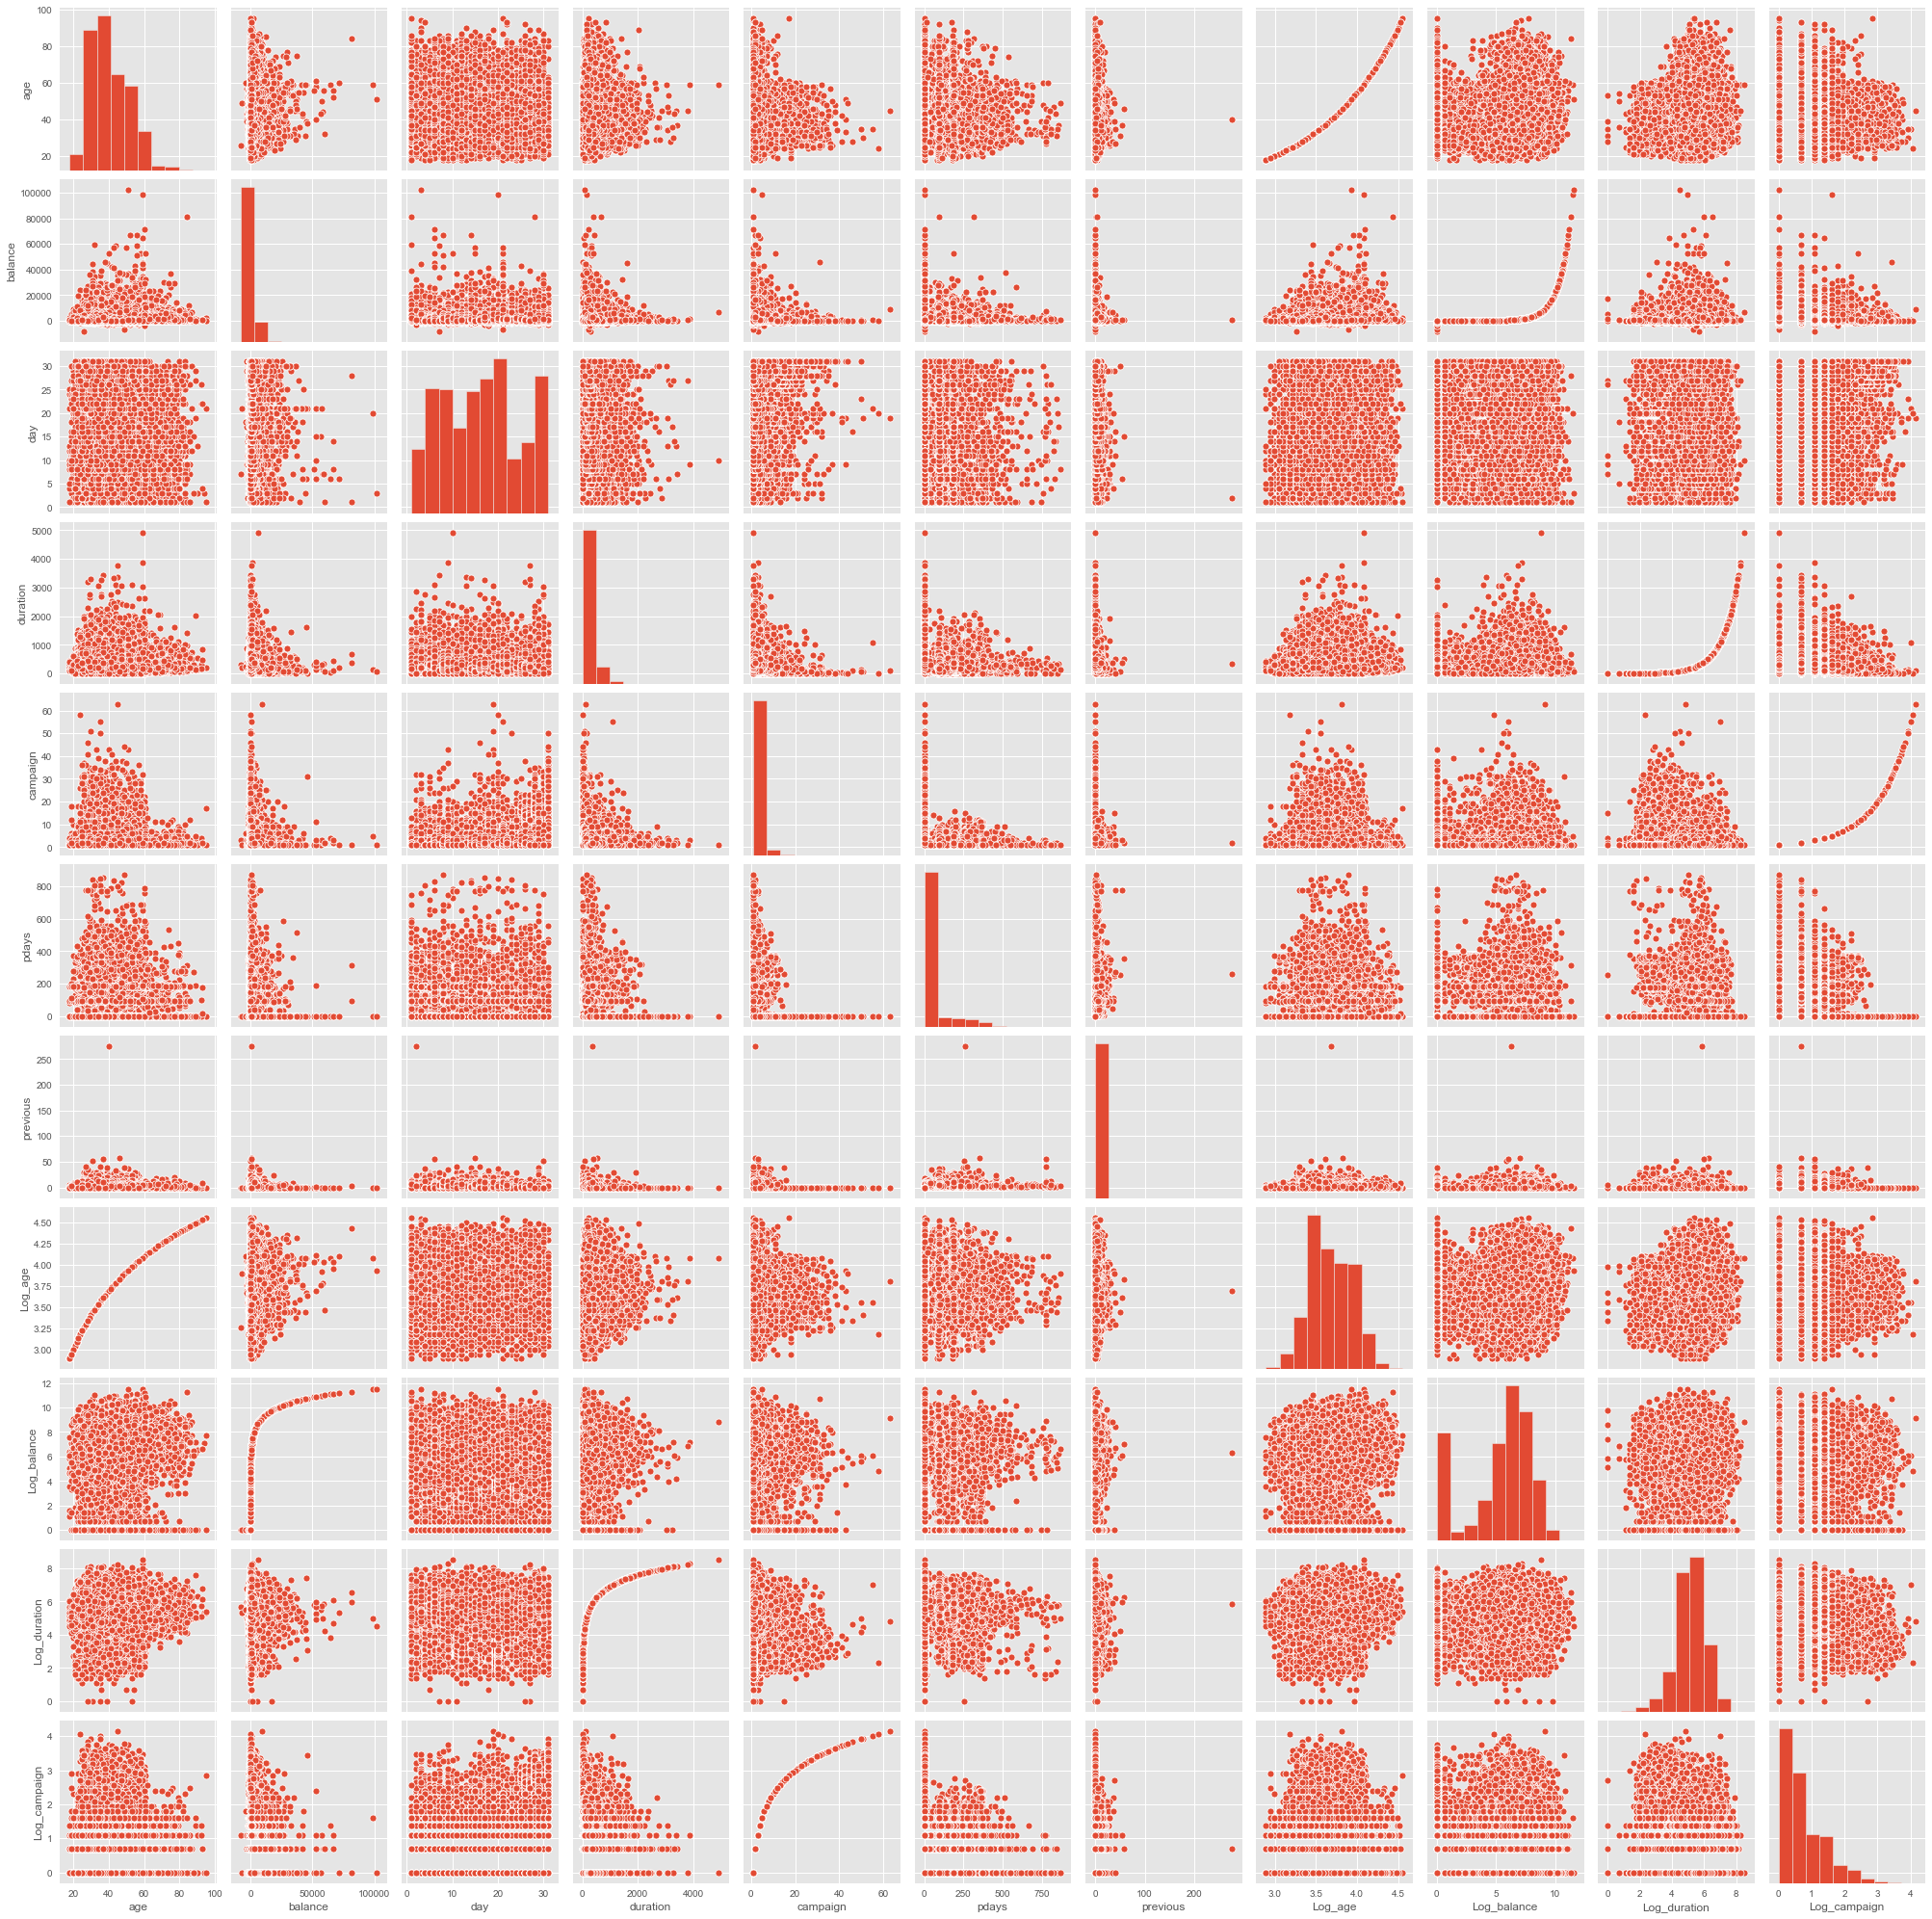

In [508]:
sns.pairplot(term)

### Data Preparation for Analytics

In [509]:
# change the data types of the relevant attributes
for feature in term.columns: # Loop through all columns in the dataframe
    if term[feature].dtype == 'object': # Only apply for columns with categorical strings
        term[feature] = pd.Categorical(term[feature])# Replace strings with an integer
term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           45211 non-null  int64   
 1   job           45211 non-null  category
 2   marital       45211 non-null  category
 3   education     45211 non-null  category
 4   default       45211 non-null  category
 5   balance       45211 non-null  int64   
 6   housing       45211 non-null  category
 7   loan          45211 non-null  category
 8   contact       45211 non-null  category
 9   day           45211 non-null  int64   
 10  month         45211 non-null  category
 11  duration      45211 non-null  int64   
 12  campaign      45211 non-null  int64   
 13  pdays         45211 non-null  int64   
 14  previous      45211 non-null  int64   
 15  poutcome      45211 non-null  category
 16  Target        45211 non-null  category
 17  Log_age       45211 non-null  float64 
 18  Log_ba

In [510]:
# replace the nominal values with ordinal ones in some variables
replace_values = {
    "education":     {"primary": 1, "secondary": 2, "tertiary": 3, "unknown":-1},
                "default": {"no": 0, "yes": 1}, "loan": {"no": 0, "yes":1}
                 }

# Create a list with variables to be encoded
oneHotCols=["marital","housing","job"] 

In [511]:
term_df =term.replace(replace_values,inplace = True)
term_df =pd.get_dummies(term, columns=oneHotCols)
term_df.columns

Index(['age', 'education', 'default', 'balance', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'Target', 'Log_age', 'Log_balance', 'Log_duration', 'Log_campaign',
       'marital_divorced', 'marital_married', 'marital_single', 'housing_no',
       'housing_yes', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')

In [516]:
term_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45211 non-null  int64   
 1   education          45211 non-null  int64   
 2   default            45211 non-null  int64   
 3   balance            45211 non-null  int64   
 4   loan               45211 non-null  int64   
 5   contact            45211 non-null  category
 6   day                45211 non-null  int64   
 7   month              45211 non-null  category
 8   duration           45211 non-null  int64   
 9   campaign           45211 non-null  int64   
 10  pdays              45211 non-null  int64   
 11  previous           45211 non-null  int64   
 12  poutcome           45211 non-null  category
 13  Target             45211 non-null  category
 14  Log_age            45211 non-null  float64 
 15  Log_balance        45211 non-null  float64 
 16  Log_

In [517]:
term_df.describe()

,age,education,default,balance,loan,day,duration,campaign,pdays,previous,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00",...,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,2.14,0.02,"1,362.27",0.16,15.81,258.16,2.76,40.20,0.58,...,0.22,0.03,0.03,0.21,0.05,0.03,0.09,0.02,0.17,0.03
std,10.62,0.65,0.13,"3,044.77",0.37,8.32,257.53,3.10,100.13,2.30,...,0.42,0.18,0.16,0.41,0.22,0.18,0.29,0.14,0.37,0.17
min,18.00,1.00,0.00,"-8,019.00",0.00,1.00,0.00,1.00,-1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,33.00,2.00,0.00,72.00,0.00,8.00,103.00,1.00,-1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,39.00,2.00,0.00,448.00,0.00,16.00,180.00,2.00,-1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,48.00,3.00,0.00,"1,428.00",0.00,21.00,319.00,3.00,-1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,95.00,3.00,1.00,"102,127.00",1.00,31.00,"4,918.00",63.00,871.00,275.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [518]:
from sklearn.model_selection import train_test_split

# Select the predictor and predicted variables and drop those not to be used for the model

X = term_df.drop(['age', 'balance', 'contact', 'day', 'month', 'duration','campaign','pdays', 'previous', 'poutcome', 'Target'],axis=1)     # Predictor feature columns (35 X m)
Y = term_df['Target']   # Predicted class

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train.shape

(31647, 23)

In [520]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(term_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(term_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Using Logistic Regression to build model

In [521]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [522]:
y_predict = logreg.predict(X_test)

In [523]:
## function to get confusion matrix in a proper format
def draw_cm( Observed, Predicted ):
    cm = confusion_matrix( Observed, Predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.8890574146048599

Testing accuracy 0.886685343556473

Confusion Matrix


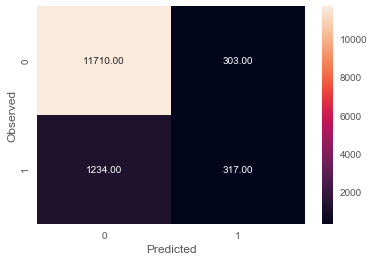

None

Recall: 0.20438426821405545

Precision: 0.5112903225806451

F1 Score: 0.2920313219714417


In [526]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test, y_predict, average="binary", pos_label="yes"))
print()
print("Precision:",precision_score(y_test,y_predict, average="binary", pos_label="yes"))
print()
print("F1 Score:",f1_score(y_test,y_predict, average="binary", pos_label="yes"))
#print()
#print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [421]:
# Metrics from the logistic Regression
LogitResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': [logreg.score(X_test, y_test)], 'F1 Score': [f1_score(y_test,y_predict, average="binary", pos_label="yes")],'Recall' : [recall_score(y_test, y_predict, average="binary", pos_label="yes")], 'Precision' :[precision_score(y_test,y_predict, average="binary", pos_label="yes")]})
LogitResultsDf.head()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.89,0.00,0.00,0.00


### Using Decision Tree to build model

In [312]:
# Call the decision tree classifier. Use 'entropy' method of finding the split columns. Other option could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [315]:
# fit the model on the training data
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [316]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.85


In [317]:
#Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.
DT_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
DT_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [318]:
print("Train: %.2f" % DT_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % DT_pruned.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


In [319]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [320]:
dot_data = StringIO()
export_graphviz(DT_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['yes','no'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT_pruned.png')
Image(graph.create_png())

NameError: name 'features' is not defined

In [322]:
preds_train = DT_pruned.predict(X_train)
preds_test = DT_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)
recall_DT = recall_score(y_test, preds_test, average="binary", pos_label="yes")
precision_DT = precision_score(y_test, preds_test, average="binary", pos_label="yes")
F1_DT = f1_score(y_test, preds_test, average="binary", pos_label="yes")

In [325]:
# Metrics from the Decision Tree
DTResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': [acc_DT], 'F1 Score': [F1_DT],'Recall' : [recall_DT], 'Precision' :[precision_DT]})
DTResultsDf.head()

,Method,Accuracy,F1 Score,Recall,Precision
0,Decision Tree,0.89,0.29,0.19,0.56


In [286]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,no,yes
Actual,,
no,11775,238
yes,1253,298


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


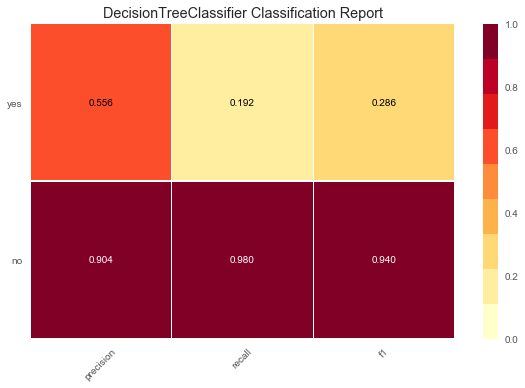

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


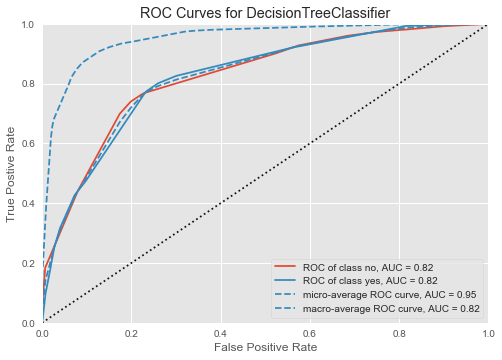

In [289]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### AdaBoost Ensemble Algorithm

In [290]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [326]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB, average="binary", pos_label="yes")
precision_AB = precision_score(y_test, pred_AB, average="binary", pos_label="yes")
F1_AB = f1_score(y_test, pred_AB, average="binary", pos_label="yes")

In [330]:
# Metrics from the Ada Boosting
ABResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'Accuracy': [acc_AB], 'F1 Score': [F1_AB],'Recall' : [recall_AB], 'Precision' :[precision_AB]})
ABResultsDf.head()

,Method,Accuracy,F1 Score,Recall,Precision
0,AdaBoost,0.89,0.22,0.13,0.57


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


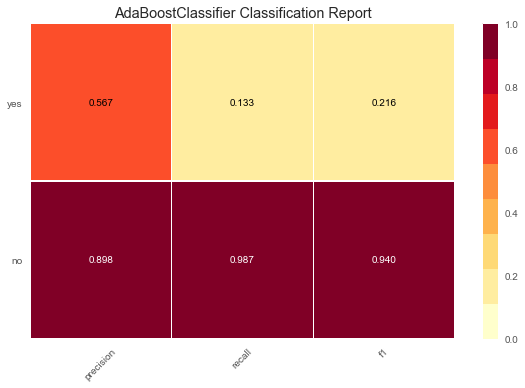

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


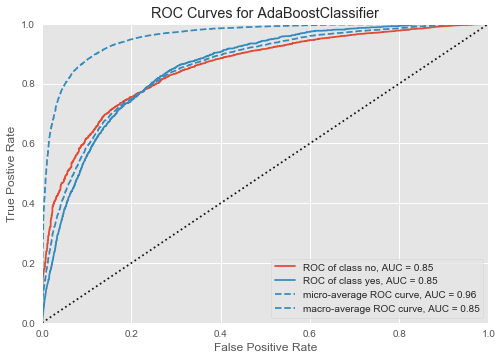

In [328]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### GradientBoost Classifier Algorithm

In [299]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [331]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB, average="binary", pos_label="yes")
precision_GB = precision_score(y_test, pred_GB, average="binary", pos_label="yes")
F1_GB = f1_score(y_test, pred_GB, average="binary", pos_label="yes")

In [332]:
# Metrics from the Gradient Boosting
GBResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'Accuracy': [acc_GB], 'F1 Score': [F1_GB],'Recall' : [recall_GB], 'Precision' :[precision_GB]})
GBResultsDf.head()

,Method,Accuracy,F1 Score,Recall,Precision
0,Gradient Boost,0.89,0.34,0.25,0.55


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


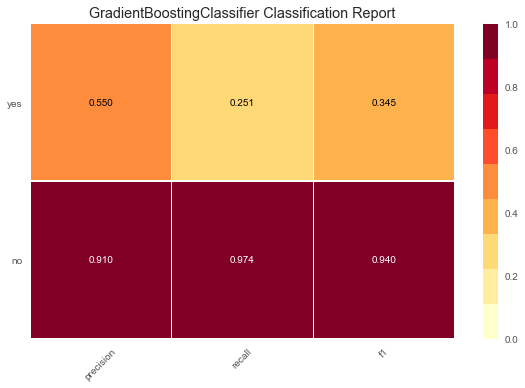

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


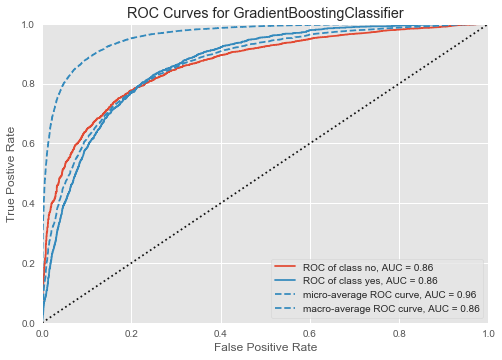

In [333]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Bagging Classifier Algorithm

In [294]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [335]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG, average="binary", pos_label="yes")
precision_BG = precision_score(y_test, pred_BG, average="binary", pos_label="yes")
F1_BG = f1_score(y_test, pred_BG, average="binary", pos_label="yes")

In [337]:
# Metrics from the Bagging
BGResultsDf = pd.DataFrame({'Method':['Bagging'], 'Accuracy': [acc_BG], 'F1 Score': [F1_BG],'Recall' : [recall_BG], 'Precision' :[precision_BG]})
BGResultsDf.head()

,Method,Accuracy,F1 Score,Recall,Precision
0,Bagging,0.89,0.37,0.29,0.51


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


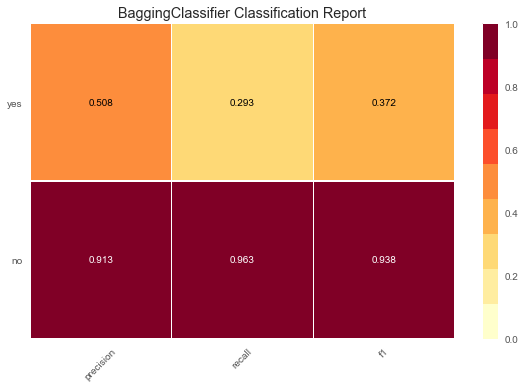

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


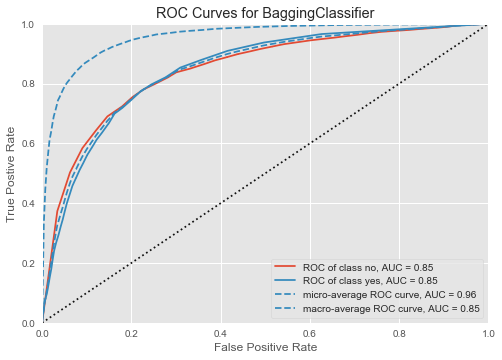

In [297]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [340]:
# Dataframe comparing all models and their metrics
all_models_results_df = pd.concat([LogitResultsDf, DTResultsDf, ABResultsDf, GBResultsDf, BGResultsDf])
all_models_results_df

,Method,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.89,0.29,0.20,0.52
0,Decision Tree,0.89,0.29,0.19,0.56
0,AdaBoost,0.89,0.22,0.13,0.57
0,Gradient Boost,0.89,0.34,0.25,0.55
0,Bagging,0.89,0.37,0.29,0.51


### Conclusion

In [ ]:

TP- True Positive (observed=1,predicted=1):
Predicted that the client will subscribe to a term deposit and they did
FP- False Positive (observed=0,predicted=1):
Predicted that the client will subscribe to a term deposit and they did not
TN- True Negative (observed=0,predicted=0):
Predicted that the client will not subscribe to a term deposit and they did not
FN- False Negative (observed=1,predicted=0):
Predicted that the client will not subscribe to a term deposit and they did
Essentially, Recall is a very important metric for this model and the Bagging Algorithm is best of all the models. Since it has the highest recall
